In [15]:
#biblioteca de calculo
import numpy as np

#biblioteca para machine learning scikit-learn
from sklearn.datasets import load_iris # carregar os dados da base iris
from sklearn.model_selection import train_test_split # funçao para dividir a base em treino e teste
from sklearn.preprocessing import OneHotEncoder #função para normalização

#funções diversas da bibliotecas keras
from keras.models import Sequential # objeto que cria rede neural
from keras.layers import Dense # objeto ue cria camadas
from keras.optimizers import Adam # otimizador da rede neural

In [16]:
iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:7])
print('Example labels: ')
print(iris_data.target[48:115])

x = iris_data.data
y_= iris_data.target.reshape(-1, 1) # Convert data to a single column

# Normalização
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
print(y[48:53])

# Dividir em Treino e Teste
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30)

Example data: 
[[5. 4. 1. 0.]
 [5. 3. 1. 0.]
 [5. 3. 1. 0.]
 [5. 3. 2. 0.]
 [5. 4. 1. 0.]
 [5. 4. 2. 0.]
 [5. 3. 1. 0.]]
Example labels: 
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


/Users/brunoluz2/Documents/github/senac-pos-big-data/analise-informacoes-bi-analytics/exercicio-07/venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
#inicia a construção da rede neural
model = Sequential()

#adicionando camadas
#na primeira camada, é necessário definir o input_shape ( que deve ser igual ao numero de colunas no X)

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc11'))
model.add(Dense(15, activation='relu', name='fc22'))
#normalmente quando é um problema de classificação, utilizamos ativação softmax na ultima camada
model.add(Dense(3, activation='softmax', name='output'))

# O método compile recebe o otimizador, função loss e a métrica
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())
     

Neural Network Model Summary: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc11 (Dense)                (None, 10)                50        
                                                                 
 fc22 (Dense)                (None, 15)                165       
                                                                 
 output (Dense)              (None, 3)                 48        
                                                                 
Total params: 263 (1.03 KB)
Trainable params: 263 (1.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
#treina o modelo usando um certo numero de iterações (épocas)
history = model.fit(train_x, train_y, verbose=2, epochs=200, validation_split=0.3)

Epoch 1/200
3/3 - 0s - loss: 2.0102 - accuracy: 0.3562 - val_loss: 1.4796 - val_accuracy: 0.4062 - 141ms/epoch - 47ms/step
Epoch 2/200
3/3 - 0s - loss: 1.8523 - accuracy: 0.3562 - val_loss: 1.3512 - val_accuracy: 0.4062 - 8ms/epoch - 3ms/step
Epoch 3/200
3/3 - 0s - loss: 1.7002 - accuracy: 0.3562 - val_loss: 1.2364 - val_accuracy: 0.4062 - 9ms/epoch - 3ms/step
Epoch 4/200
3/3 - 0s - loss: 1.5660 - accuracy: 0.3562 - val_loss: 1.1446 - val_accuracy: 0.4062 - 8ms/epoch - 3ms/step
Epoch 5/200
3/3 - 0s - loss: 1.4520 - accuracy: 0.3562 - val_loss: 1.0671 - val_accuracy: 0.4062 - 9ms/epoch - 3ms/step
Epoch 6/200
3/3 - 0s - loss: 1.3455 - accuracy: 0.3562 - val_loss: 0.9995 - val_accuracy: 0.4062 - 8ms/epoch - 3ms/step
Epoch 7/200
3/3 - 0s - loss: 1.2433 - accuracy: 0.3562 - val_loss: 0.9396 - val_accuracy: 0.4062 - 8ms/epoch - 3ms/step
Epoch 8/200
3/3 - 0s - loss: 1.1607 - accuracy: 0.3562 - val_loss: 0.8853 - val_accuracy: 0.4062 - 9ms/epoch - 3ms/step
Epoch 9/200
3/3 - 0s - loss: 1.0822 -

In [19]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9111
Final test set loss: 0.190623
Final test set accuracy: 0.911111


[Text(0.5, 23.52222222222222, 'Época')]

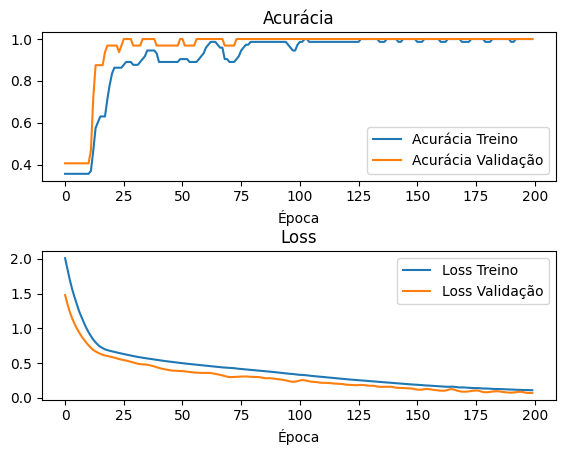

In [20]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['accuracy']
xv=history.history['val_accuracy']
axs[0].plot(x, label='Acurácia Treino')
axs[0].plot(xv, label='Acurácia Validação')
axs[0].legend()
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
xv=history.history['val_loss']
axs[1].plot(x, label='Loss Treino')
axs[1].plot(xv, label='Loss Validação')
axs[1].legend()
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [21]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
import io
import requests
import numpy as np

In [22]:
url = "https://raw.githubusercontent.com/silviostanzani/PosBigData/master/Auto2.csv"
s = requests.get(url).content
dataframe = read_csv(io.StringIO(s.decode('utf-8')))
print(dataframe)
print(dataframe.columns)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X_ = dataset[:,2:8]
y_ = dataset[:,1]
#print(X)
#print(y)

X = np.asarray(X_).astype(np.float32)
y = np.asarray(y_).astype(np.float32)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0          86    2790          15.6    82   
393  44.0          4          97.0          52    2130          24.6    82   
394  32.0          4         135.0          84    2295          11.6    82   
395  28.0          4         120.0          79    2625          18.6    82   
396  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [23]:
model = Sequential()

model.add(Dense(20, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [24]:
history=model.fit(train_x, train_y, verbose=2, epochs=200, validation_split=0.3)

Epoch 1/200
7/7 - 0s - loss: 108.7913 - mse: 108.7913 - val_loss: 2.9333 - val_mse: 2.9333 - 125ms/epoch - 18ms/step
Epoch 2/200
7/7 - 0s - loss: 12.4112 - mse: 12.4112 - val_loss: 35.1340 - val_mse: 35.1340 - 9ms/epoch - 1ms/step
Epoch 3/200
7/7 - 0s - loss: 21.5578 - mse: 21.5578 - val_loss: 5.1859 - val_mse: 5.1859 - 10ms/epoch - 1ms/step
Epoch 4/200
7/7 - 0s - loss: 1.8228 - mse: 1.8228 - val_loss: 4.8772 - val_mse: 4.8772 - 11ms/epoch - 2ms/step
Epoch 5/200
7/7 - 0s - loss: 5.0714 - mse: 5.0714 - val_loss: 3.2997 - val_mse: 3.2997 - 9ms/epoch - 1ms/step
Epoch 6/200
7/7 - 0s - loss: 1.1353 - mse: 1.1353 - val_loss: 0.6672 - val_mse: 0.6672 - 10ms/epoch - 1ms/step
Epoch 7/200
7/7 - 0s - loss: 1.1208 - mse: 1.1208 - val_loss: 1.1662 - val_mse: 1.1662 - 10ms/epoch - 1ms/step
Epoch 8/200
7/7 - 0s - loss: 0.5982 - mse: 0.5982 - val_loss: 0.4031 - val_mse: 0.4031 - 10ms/epoch - 1ms/step
Epoch 9/200
7/7 - 0s - loss: 0.5443 - mse: 0.5443 - val_loss: 0.5623 - val_mse: 0.5623 - 10ms/epoch - 

In [25]:
results = model.evaluate(test_x, test_y)
print(results)

3/3 [==============================] - 0s 835us/step - loss: 0.3387 - mse: 0.3387
[0.3386971652507782, 0.3386971652507782]


[Text(0.5, 23.52222222222222, 'Época')]

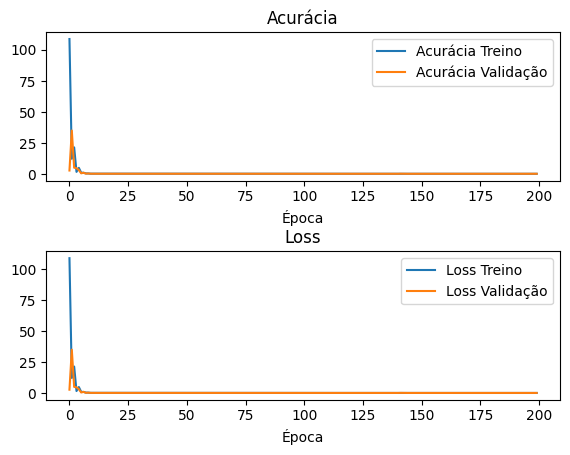

In [26]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['mse']
xv=history.history['val_mse']
axs[0].plot(x, label='Acurácia Treino')
axs[0].plot(xv, label='Acurácia Validação')
axs[0].legend()
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
xv=history.history['val_loss']
axs[1].plot(x, label='Loss Treino')
axs[1].plot(xv, label='Loss Validação')
axs[1].legend()
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [27]:
#train_y, test_y
res=model.predict(test_x)
#res2=res.astype(float)
np.set_printoptions(precision=0)
#print(np.around(res2[:10],3))
print(res[:10])
print(test_y[:10])

3/3 [==============================] - 0s 612us/step
[[4.]
 [7.]
 [7.]
 [4.]
 [4.]
 [4.]
 [7.]
 [8.]
 [5.]
 [5.]]
[4. 8. 8. 4. 4. 4. 8. 8. 4. 6.]


In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, res, squared=False)

0.5819769